In [6]:
# Pregunta 1: Utilice yfinance para extraer datos bursátiles
#Restablezca el índice, guarde y visualice las cinco primeras filas del marco de datos tesla_data utilizando la función head.

import yfinance as yf

# Crear un objeto para Tesla
tesla = yf.Ticker("TSLA")

# Obtener datos históricos del precio de las acciones
tesla_data = tesla.history(period="max")

# Restablecer el índice
tesla_data.reset_index(inplace=True)

# Mostrar las primeras cinco filas del DataFrame
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [35]:
#Pregunta 2: Utilizar Webscraping para extraer datos de ingresos de Tesla
#Muestre las cinco últimas filas del marco de datos tesla_revenue utilizando la función tail. 

import requests
from bs4 import BeautifulSoup
import pandas as pd

# Descargar la página web
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text

# Parsear los datos HTML usando BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Buscar la tabla con los datos de ingresos de Tesla
table = soup.find('table')

# Extraer las filas de la tabla
rows = table.find_all('tr')
data = []

# Procesar cada fila para obtener las columnas "Date" y "Revenue"
for row in rows[1:]:  # Ignorar el encabezado
    cols = row.find_all('td')
    if len(cols) == 2 and all(col.text.strip() for col in cols):  # Asegurar que hay 2 columnas y no están vacías
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        data.append([date, revenue])

# Crear el DataFrame
tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

# Mostrar las últimas cinco filas
print(tesla_revenue.tail())

    Date Revenue
8   2013  $2,013
9   2012    $413
10  2011    $204
11  2010    $117
12  2009    $112


In [24]:
#Pregunta 3: Utilice yfinance para extraer datos bursátiles
#Restablezca el índice, guarde y visualice las cinco primeras filas del marco de datos gme_data utilizando la función head.
import yfinance as yf
import pandas as pd

# Crear un objeto de yfinance para GameStop (GME)
gme = yf.Ticker('GME')

# Obtener datos históricos para GameStop
gme_data = gme.history(period="max")

# Restablecer el índice
gme_data.reset_index(inplace=True)

# Mostrar las cinco primeras filas del DataFrame
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578048  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [12]:
#Pregunta 4: Utilizar Webscraping para extraer datos de ingresos de la GME
#Muestre las cinco últimas filas del marco de datos gme_revenue utilizando la función tail.


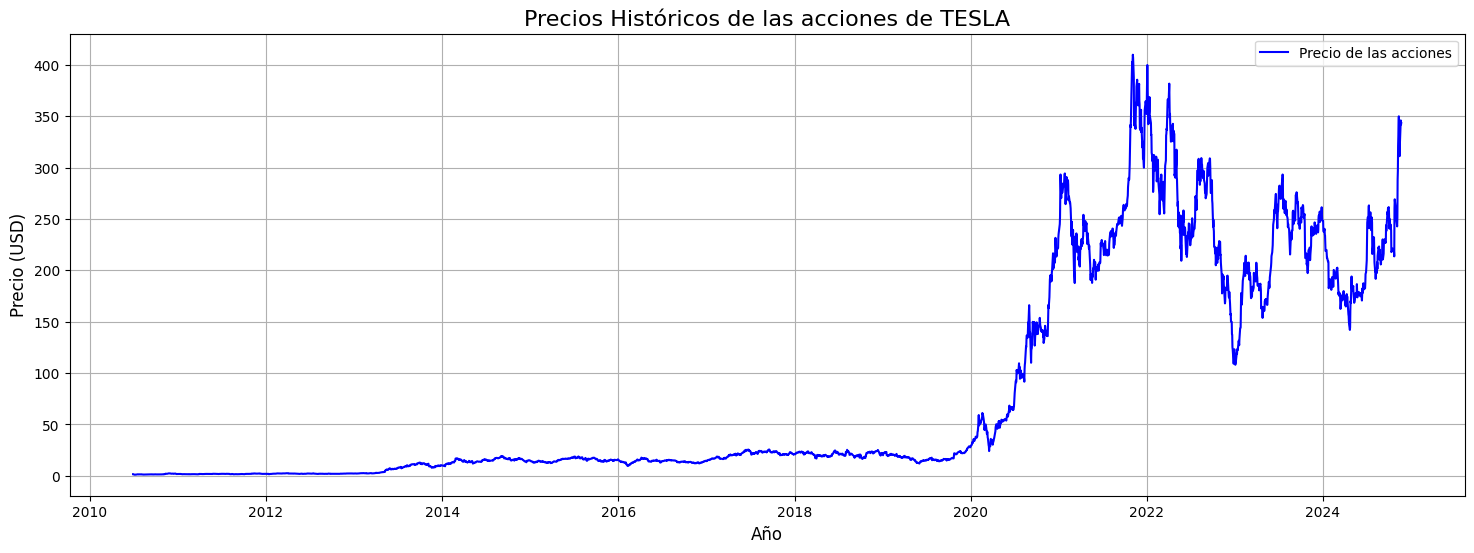

In [7]:
#Pregunta 5: Representar gráficamente las acciones de Tesla
#Utilice la función make_graph para representar gráficamente los datos de las acciones de Tesla, proporcione también un título para el gráfico.

import yfinance as yf
import matplotlib.pyplot as plt

# Descargar toda la información histórica de Tesla (TSLA)
tesla_data = yf.download("TSLA", progress=False)

# Función para graficar los datos
def make_graph(data, title):
    plt.figure(figsize=(18, 6))
    plt.plot(data.index, data["Close"], label="Precio de las acciones", color="blue")
    plt.title(title, fontsize=16)
    plt.xlabel("Año", fontsize=12)
    plt.ylabel("Precio (USD)", fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.show()

# Graficar los precios de cierre con un título
make_graph(tesla_data, "Precios Históricos de las acciones de TESLA")

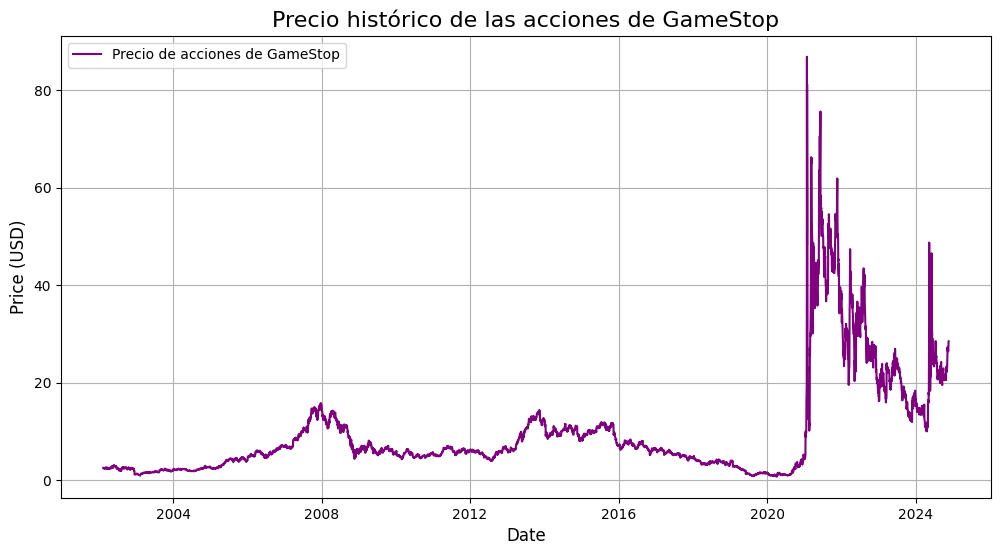

In [11]:
#Pregunta 6: Representar gráficamente las acciones de GameStop
#Utilice la función make_graph para representar gráficamente los datos de existencias de GameStop, proporcione también un título para el gráfico.

import yfinance as yf
import matplotlib.pyplot as plt

# Descargar los datos históricos de GameStop (GME)
gamestop_data = yf.download("GME", progress=False)

# Función para graficar los datos
def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data["Close"], label="Precio de acciones de GameStop", color="purple")
    plt.title(title, fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Price (USD)", fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.show()

# Graficar los precios de cierre de GameStop con un título
make_graph(gamestop_data, "Precio histórico de las acciones de GameStop")

In [ ]:
#